In [3]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf
import random

<hr>

# Loading Data

In [209]:
data_path = "./nicolas/recordings"
fixedname = ['george', 'jackson', 'lucas','nicolas', 'theo', 'yweweler']
sets = []
name = []
numbers = []

for s in range(0, 10):
    for n in fixedname:
        for i in range(0, 50):
            sets.append(s)
            name.append(n)
            numbers.append(i)

list_files = pd.DataFrame(data={'number': sets, 'name': name, 'set': numbers})
list_files['path'] = data_path + '/' + list_files['number'].astype(str) +'_' + list_files['name'] + '_' + list_files['set'].astype(str) + '.wav'

# EDA and Visualization

In [210]:
list_files.head(20)


,number,name,set,path
0,0,george,0,./nicolas/recordings/0_george_0.wav
1,0,george,1,./nicolas/recordings/0_george_1.wav
2,0,george,2,./nicolas/recordings/0_george_2.wav
3,0,george,3,./nicolas/recordings/0_george_3.wav
4,0,george,4,./nicolas/recordings/0_george_4.wav
5,0,george,5,./nicolas/recordings/0_george_5.wav
6,0,george,6,./nicolas/recordings/0_george_6.wav
7,0,george,7,./nicolas/recordings/0_george_7.wav
8,0,george,8,./nicolas/recordings/0_george_8.wav
9,0,george,9,./nicolas/recordings/0_george_9.wav


## Visualizing random sample

In [247]:
def visulize_random_sample(dataframe):
  #to hear the audio sample
  filerandom = list_files.sample(ignore_index=True, axis=0)
  filename = list(filerandom['path'])[0]
  sample_sound, sample_rate = librosa.load(filename)
  print(filerandom)
  return sample_sound, sample_rate


In [249]:
sample_sound, sample_rate = visulize_random_sample(list_files)
ipd.Audio(sample_sound, rate=sample_rate)


   number     name  set                                   path
0       9  nicolas   28  ./nicolas/recordings/9_nicolas_28.wav


### Waveform

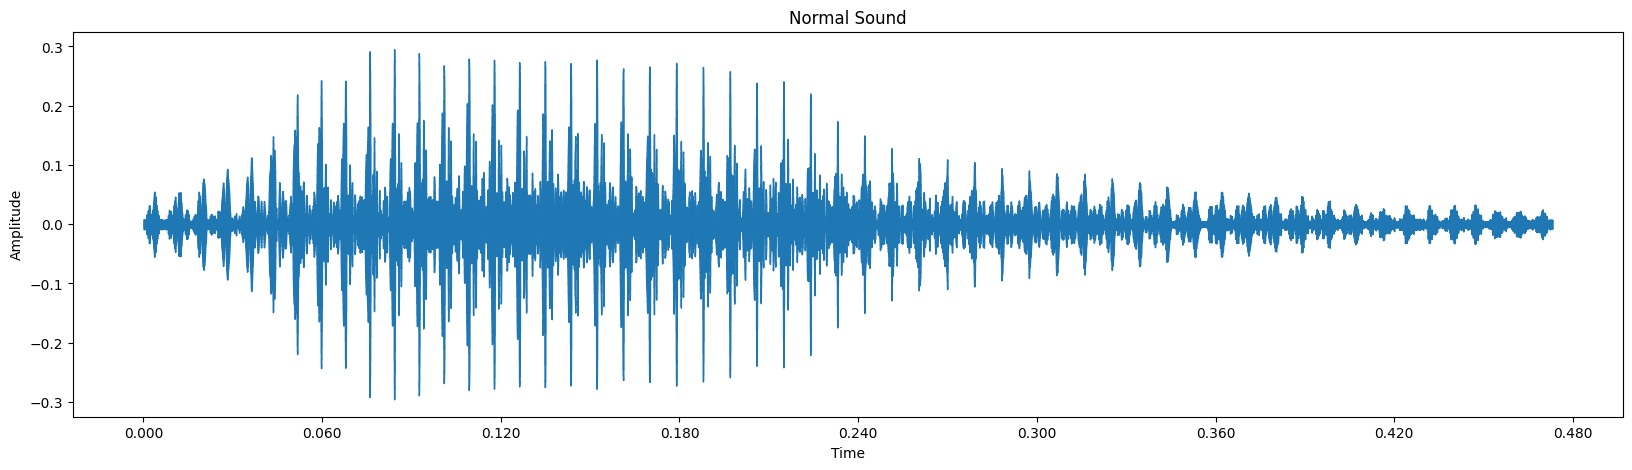

In [250]:
#librosa.display.waveshow(data, sr=sampling_rate)

plt.figure(figsize=(20,5))
librosa.display.waveshow(sample_sound, sr = sample_rate)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

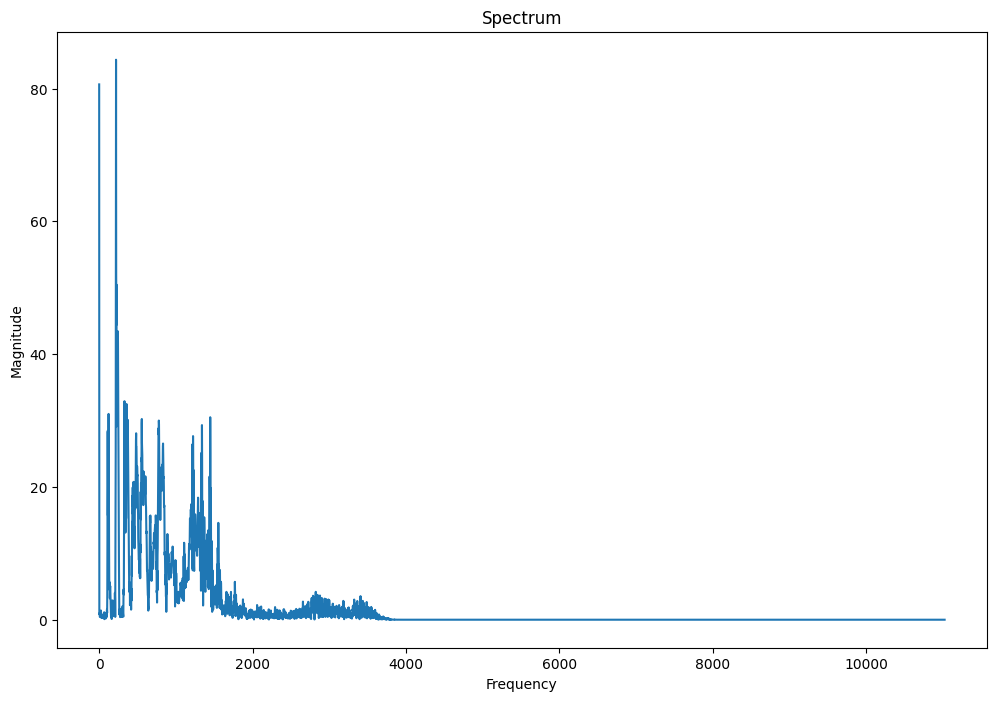

In [252]:
fft_normal = np.fft.fft(sample_sound) #fast Fourier transform
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

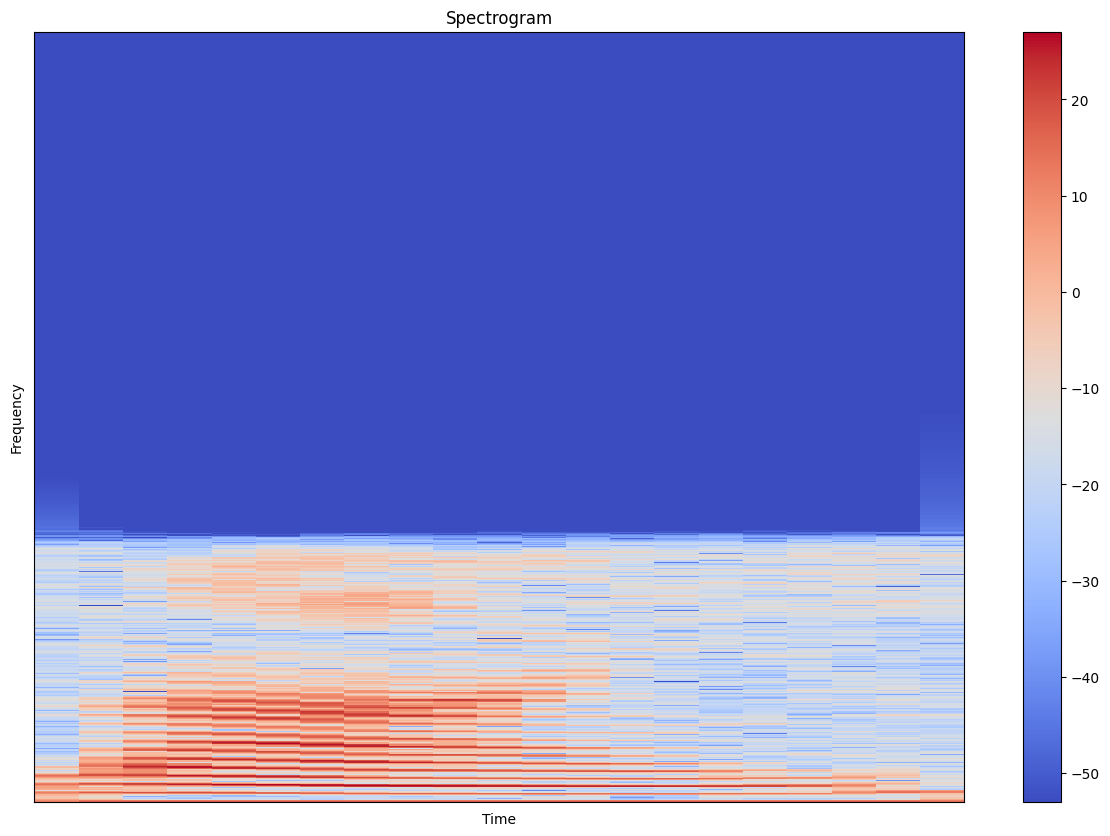

In [253]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(sample_sound, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

### MFCCs

C:\Users\Dell\AppData\Local\Temp\ipykernel_6976\697840238.py:3: FutureWarning: Pass y=[ 0.00042647 -0.00230376 -0.00613111 ... -0.0070879  -0.00465848
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


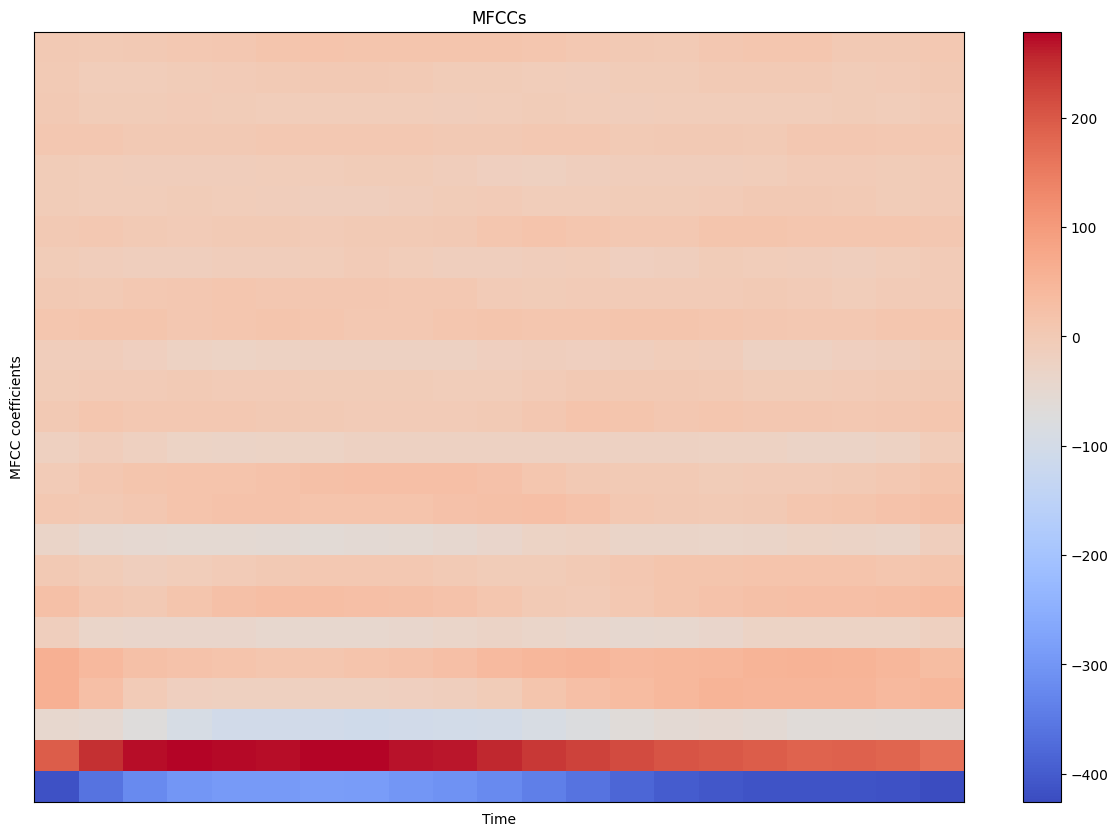

In [254]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

# Loading Data

In [ ]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

# Preprocessing

## *Encoding*

In [ ]:
# simple encoding of categories, convert to only 3 types:
# Normal (Include extrahls and extrastole)
# Murmur
# Artifact
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [ ]:
# 22 KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]

extrastole_files = fnmatch.filter(os.listdir(extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=extrastole_data,file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [2 for items in extrastole_files]

print ("Loading Done")


load file  ./heartbeat//normal/normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
load file  ./heartbeat//normal/normal_noisynormal_101_1305030823364_E.wav


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7676\1063719324.py:13: FutureWarning: Pass size=220500 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(X, input_length)


fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
load file  ./heartbeat//normal/normal_noisynormal_104_1305032492469_A.wav
load file  ./heartbeat//normal/normal_noisynormal_105_1305033453095_A.wav
load file  ./heartbeat//normal/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  ./heartbeat//normal/normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght : normal_noisynormal_106_1306776721273_A.wav
load file  ./heartbeat//normal/normal_noisynormal_107_1305654946865_A.wav
fixing audio lenght : normal_noisynormal_107_1305654946865_A.wav
load file  ./heartbeat//normal/normal_noisynormal_108_1305654420093_A.wav
fixing audio lenght : normal_noisynormal_108_1305654420093_A.wav
load file  ./heartbeat//normal/normal_noisynormal_108_1305654420093_B.wav
load file  ./heartbeat//normal/normal_noisynormal_109_1305653646620_A.wav
load file  ./heartbeat//normal/normal_noisynormal_109_1305653972028_A.wav
fixing au

load file  ./heartbeat//normal/normal_noisynormal_155_1306935902813_C.wav
fixing audio lenght : normal_noisynormal_155_1306935902813_C.wav
load file  ./heartbeat//normal/normal_noisynormal_157_1306937583792_A.wav
load file  ./heartbeat//normal/normal_noisynormal_157_1306937583792_B.wav
load file  ./heartbeat//normal/normal_noisynormal_158_1306947254705_B1.wav
fixing audio lenght : normal_noisynormal_158_1306947254705_B1.wav
load file  ./heartbeat//normal/normal_noisynormal_158_1306947254705_D.wav
load file  ./heartbeat//normal/normal_noisynormal_159_1307018640315_A1.wav
fixing audio lenght : normal_noisynormal_159_1307018640315_A1.wav
load file  ./heartbeat//normal/normal_noisynormal_159_1307018640315_B.wav
fixing audio lenght : normal_noisynormal_159_1307018640315_B.wav
load file  ./heartbeat//normal/normal_noisynormal_163_1307104470471_D1.wav
fixing audio lenght : normal_noisynormal_163_1307104470471_D1.wav
load file  ./heartbeat//normal/normal_noisynormal_167_1307111318050_A1.wav
fi

fixing audio lenght : normal__137_1306764999211_D.wav
load file  ./heartbeat//normal/normal__139_1306519274653_A.wav
fixing audio lenght : normal__139_1306519274653_A.wav
load file  ./heartbeat//normal/normal__140_1306519735121_A.wav
load file  ./heartbeat//normal/normal__140_1306519735121_B.wav
load file  ./heartbeat//normal/normal__140_1306519735121_D1.wav
fixing audio lenght : normal__140_1306519735121_D1.wav
load file  ./heartbeat//normal/normal__141_1306520154450_B.wav
fixing audio lenght : normal__141_1306520154450_B.wav
load file  ./heartbeat//normal/normal__141_1306520154450_C.wav
fixing audio lenght : normal__141_1306520154450_C.wav
load file  ./heartbeat//normal/normal__143_1306763822290_B.wav
fixing audio lenght : normal__143_1306763822290_B.wav
load file  ./heartbeat//normal/normal__143_1306763822290_C.wav
fixing audio lenght : normal__143_1306763822290_C.wav
load file  ./heartbeat//normal/normal__145_1307987561278_B.wav
fixing audio lenght : normal__145_1307987561278_B.wav

load file  ./heartbeat//normal/normal__183_1308072703477_B.wav
fixing audio lenght : normal__183_1308072703477_B.wav
load file  ./heartbeat//normal/normal__183_1308072703477_C.wav
fixing audio lenght : normal__183_1308072703477_C.wav
load file  ./heartbeat//normal/normal__184_1308073010307_B.wav
load file  ./heartbeat//normal/normal__184_1308073010307_D.wav
load file  ./heartbeat//normal/normal__186_1308073648738_C1.wav
fixing audio lenght : normal__186_1308073648738_C1.wav
load file  ./heartbeat//normal/normal__186_1308073648738_D.wav
fixing audio lenght : normal__186_1308073648738_D.wav
load file  ./heartbeat//normal/normal__188_1308074301731_C.wav
fixing audio lenght : normal__188_1308074301731_C.wav
load file  ./heartbeat//normal/normal__188_1308074301731_D.wav
fixing audio lenght : normal__188_1308074301731_D.wav
load file  ./heartbeat//normal/normal__190_1308076920011_C1.wav
fixing audio lenght : normal__190_1308076920011_C1.wav
load file  ./heartbeat//normal/normal__190_13080769

fixing audio lenght : normal__230_1308595300880_C.wav
load file  ./heartbeat//normal/normal__232_1308748524018_A.wav
fixing audio lenght : normal__232_1308748524018_A.wav
load file  ./heartbeat//normal/normal__232_1308748524018_B.wav
fixing audio lenght : normal__232_1308748524018_B.wav
load file  ./heartbeat//normal/normal__232_1308748524018_B1.wav
fixing audio lenght : normal__232_1308748524018_B1.wav
load file  ./heartbeat//normal/normal__232_1308748524018_C.wav
fixing audio lenght : normal__232_1308748524018_C.wav
load file  ./heartbeat//normal/normal__232_1308748524018_D1.wav
fixing audio lenght : normal__232_1308748524018_D1.wav
load file  ./heartbeat//normal/normal__235_1308749032454_C.wav
fixing audio lenght : normal__235_1308749032454_C.wav
load file  ./heartbeat//normal/normal__235_1308749032454_D.wav
fixing audio lenght : normal__235_1308749032454_D.wav
load file  ./heartbeat//normal/normal__237_1308750231222_C.wav
fixing audio lenght : normal__237_1308750231222_C.wav
load f

load file  ./heartbeat//murmur/murmur_noisymurmur_292_1311185449649_D.wav
fixing audio lenght : murmur_noisymurmur_292_1311185449649_D.wav
load file  ./heartbeat//murmur/murmur_noisymurmur_293_1311680805936_C.wav
load file  ./heartbeat//murmur/murmur_noisymurmur_293_1311680805936_D.wav
Loading Done


In [ ]:
# unlabel_datala files
Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]


print ("Loading of unlabel data done")

Loading of unlabel data done


## *concatenation*

In [ ]:
#combine set-a and set-b 
x_data = np.concatenate((artifact_sounds, normal_sounds, extrahls_sounds, murmur_sounds, extrastole_sounds))

y_data = np.concatenate((artifact_labels, normal_labels, extrahls_labels, murmur_labels, extrastole_labels))

test_x = np.concatenate((Aunlabelledtest_sounds,Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels,Bunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  380 0


In [ ]:
x_data.shape

(380,)

## *train_test_validation split*

In [ ]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

### Correct imbalanced data using class weight

In [ ]:
TRAIN_IMG_COUNT = 578
COUNT_0 = 40  #artifact
COUNT_1 = 129 #murmur
COUNT_2 = 409 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

# LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

In [ ]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
losses[['acc','val_acc']].plot()

# Prediction

In [ ]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

# Saving and loading model

In [ ]:
model.save('heart_sounds.h5') #HDF5 file (Hierarchical Data Format 5)

NameError: name 'model' is not defined

In [ ]:
# prediction class 
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

NameError: name 'model' is not defined

In [ ]:
def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration) 
  dur = librosa.get_duration(y=X, sr=sr)
  # pad audio file same duration
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, input_length)                
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array

In [ ]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))